In [92]:
#load the data
import pandas as pd
import numpy as np
data = pd.read_excel('student_exam_data.xlsx')
data.head()

,exam1,exam2,pass
0,50.6,45.4,0
1,86.5,70.5,1
2,11.7,32.2,0
3,31.3,23.7,0
4,100.0,96.6,1


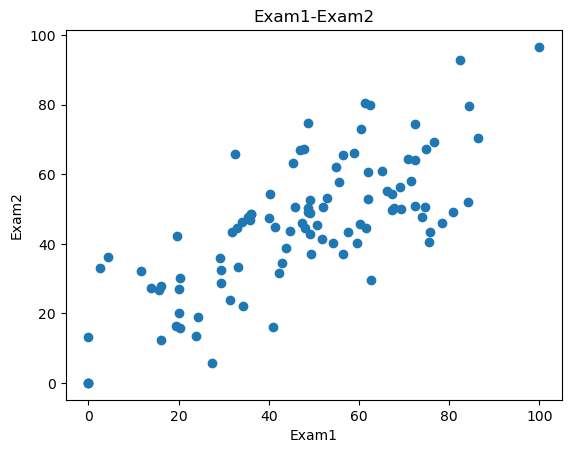

In [58]:
#visualize the data
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(data.loc[:,'exam1'],data.loc[:,'exam2'])
plt.title('Exam1-Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.show()

In [59]:
mask=data.loc[:,'pass']==1
print(mask)

0     False
1      True
2     False
3     False
4      True
      ...  
95    False
96    False
97    False
98    False
99    False
Name: pass, Length: 100, dtype: bool


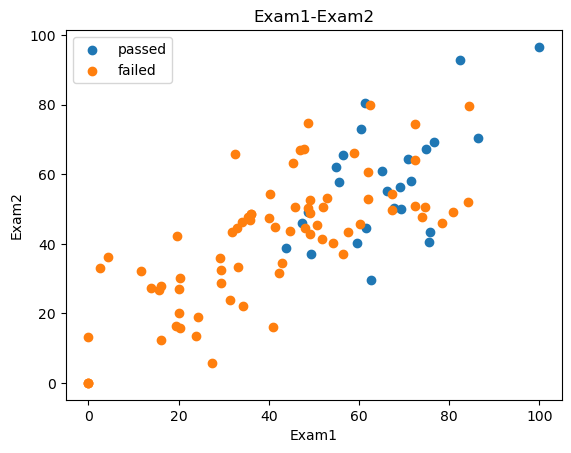

In [60]:
fig2 = plt.figure()
passed=plt.scatter(data.loc[:,'exam1'][mask],data.loc[:,'exam2'][mask])
failed=plt.scatter(data.loc[:,'exam1'][~mask],data.loc[:,'exam2'][~mask])
plt.legend((passed,failed),('passed','failed'))
plt.title('Exam1-Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.show()


In [61]:
#define X,y
X = data.drop('pass',axis = 1)#直接去掉pass列的方法
y = data.loc[:,'pass']
X1 = data.loc[:,'exam1']
X2 = data.loc[:,'exam2']

In [62]:
print(X.shape,y.shape)

(100, 2) (100,)


In [63]:
#establish the model and train it
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X,y)
print(LR.feature_names_in_)

['exam1' 'exam2']


In [64]:
#show the predicted result and its accuracy
y_predict = LR.predict(X)
print(y_predict)

[0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1]


In [65]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)
print(accuracy)

0.75


In [66]:
#exam1=70,exam2=65
new_data = pd.DataFrame({
    'exam1':[70],
    'exam2':[65]
})
y_test = LR.predict(new_data)
print('passed' if  y_test else 'failed')

passed


边界函数： θ + θ X1+ θ X2=0

In [67]:
theta0 = LR.intercept_
theta1,theta2 = LR.coef_[0][0],LR.coef_[0][1]
X2_new = -(theta0+theta1*X1)/theta2

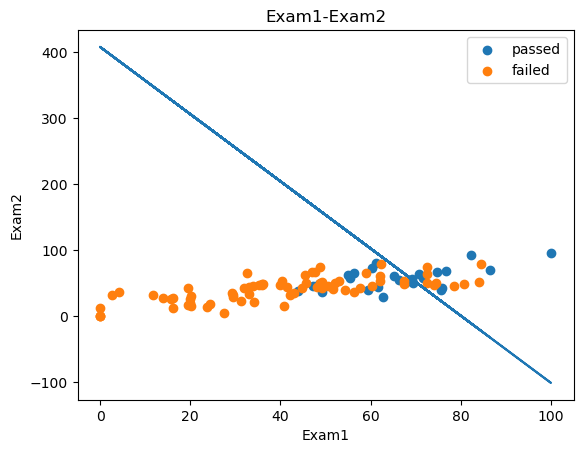

In [68]:
fig3 = plt.figure()
passed=plt.scatter(data.loc[:,'exam1'][mask],data.loc[:,'exam2'][mask])
failed=plt.scatter(data.loc[:,'exam1'][~mask],data.loc[:,'exam2'][~mask])
plt.plot(X1,X2_new)
plt.legend((passed,failed),('passed','failed'))
plt.title('Exam1-Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.show()

In [69]:
X1_2 = X1*X1
X2_2 = X2*X2
X1_X2 = X1*X2
X_new = {'X1':X1,'X2':X2,'X1_2':X1_2,'X2_2':X2_2,'X1_X2':X1_X2}
X_N = pd.DataFrame(X_new)
print(X_N)

       X1    X2      X1_2     X2_2    X1_X2
0    50.6  45.4   2560.36  2061.16  2297.24
1    86.5  70.5   7482.25  4970.25  6098.25
2    11.7  32.2    136.89  1036.84   376.74
3    31.3  23.7    979.69   561.69   741.81
4   100.0  96.6  10000.00  9331.56  9660.00
..    ...   ...       ...      ...      ...
95   13.9  27.4    193.21   750.76   380.86
96   46.9  67.1   2199.61  4502.41  3146.99
97   67.4  49.6   4542.76  2460.16  3343.04
98   48.7  74.7   2371.69  5580.09  3637.89
99   72.5  74.5   5256.25  5550.25  5401.25

[100 rows x 5 columns]


二阶边界函数(theta0-5)

In [70]:
#establish new model and train
LR2 = LogisticRegression()
LR2.fit(X_N,y)

LogisticRegression()

In [71]:
y2_predict = LR2.predict(X_N)
accuracy2 = accuracy_score(y,y2_predict)
print(accuracy2)

0.8


In [95]:
X1_new = X1.sort_values()
theta0 = LR2.intercept_
theta1,theta2,theta3,theta4,theta5 = LR2.coef_[0][0],LR2.coef_[0][1],LR2.coef_[0][2],LR2.coef_[0][3],LR2.coef_[0][4]
a = theta4
b = theta5*X1_new+theta2
c = theta0+theta1*X1_new+theta3*X1_new*X1_new
X2_new_boundary = (-b+np.sqrt(b*b-4*a*c))/(2*a)

In [99]:
print(theta1,theta2,theta3,theta4,theta5)

0.48441385276272936 -0.17970620749497548 -0.00443491108281602 0.0004056536866856892 0.0023374750920649077


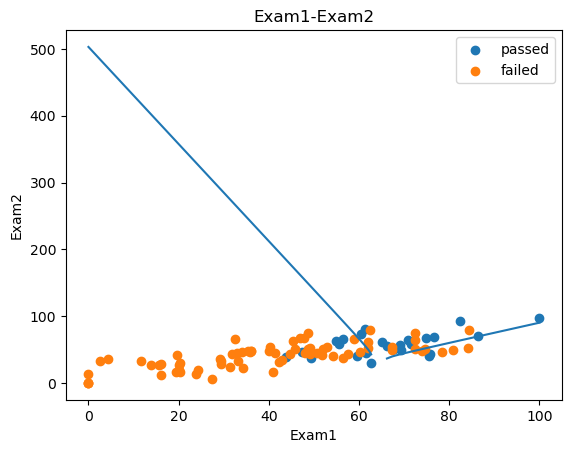

In [88]:
fig5 = plt.figure()
passed=plt.scatter(data.loc[:,'exam1'][mask],data.loc[:,'exam2'][mask])
failed=plt.scatter(data.loc[:,'exam1'][~mask],data.loc[:,'exam2'][~mask])
plt.plot(X1_new,X2_new_boundary)
plt.legend((passed,failed),('passed','failed'))
plt.title('Exam1-Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.show()

